# Practica 7 - Serie discreta de Fourier

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 16/10/2024

## Transformada Rápida de Fourier para señales discretas

### 1. Genere la siguiente señal de acuerdo con el último número de su cédula (C).

|sin(2π ∗ (C + 5) ∗ 10 ∗ t)|

La frecuencia de muestreo debe ser al menos 20 veces mayor que la frecuencia de su señal.


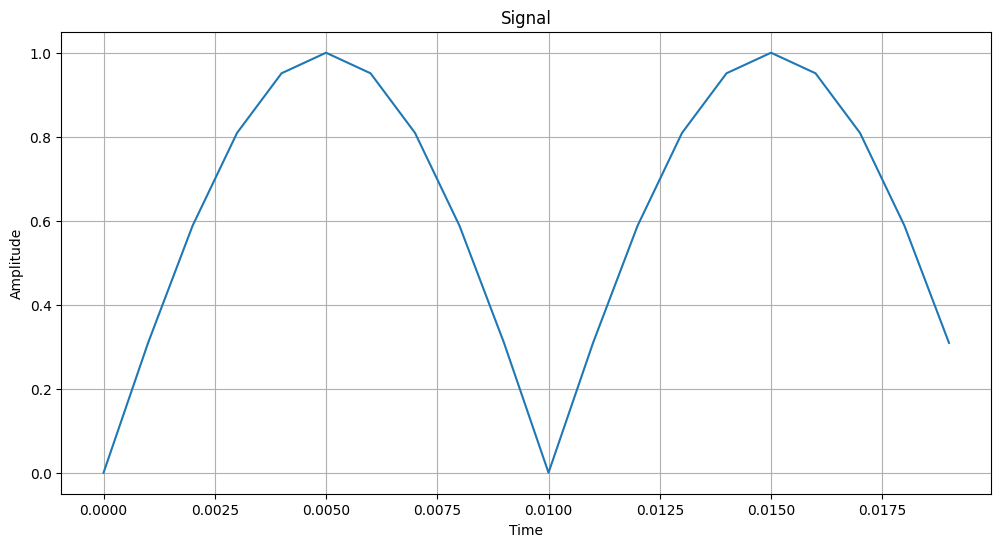

In [174]:
import numpy as np
import matplotlib.pyplot as plt

def dftmatrix(N, Nfft):
    #construct DFT matrix
    k= np.arange(Nfft)
    if N is None: N = Nfft
    n = np.arange(N)
    U = np.matrix(np.exp(1j* 2*np.pi/Nfft *k*n[:,None]))
    return U/np.sqrt(Nfft)

#Constants for frequency and sampling rate
C = 0
f_signal = (C + 5)*10
f_sampling = 20*f_signal

#Time vector for 2 period of the signal
t = np.arange(0, 1/f_signal , 1/f_sampling)
x = np.abs(np.sin(2*np.pi*f_signal*t))

#Graph of the signal
plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.title('Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


### 2. Calcule la matriz de transformación U y grafique la transformada de Fourier de la señal asignada para al menos 3 distintos valores de NFFT (grafique los resultados usando subplots). ¿Qué se puede concluir al respecto?


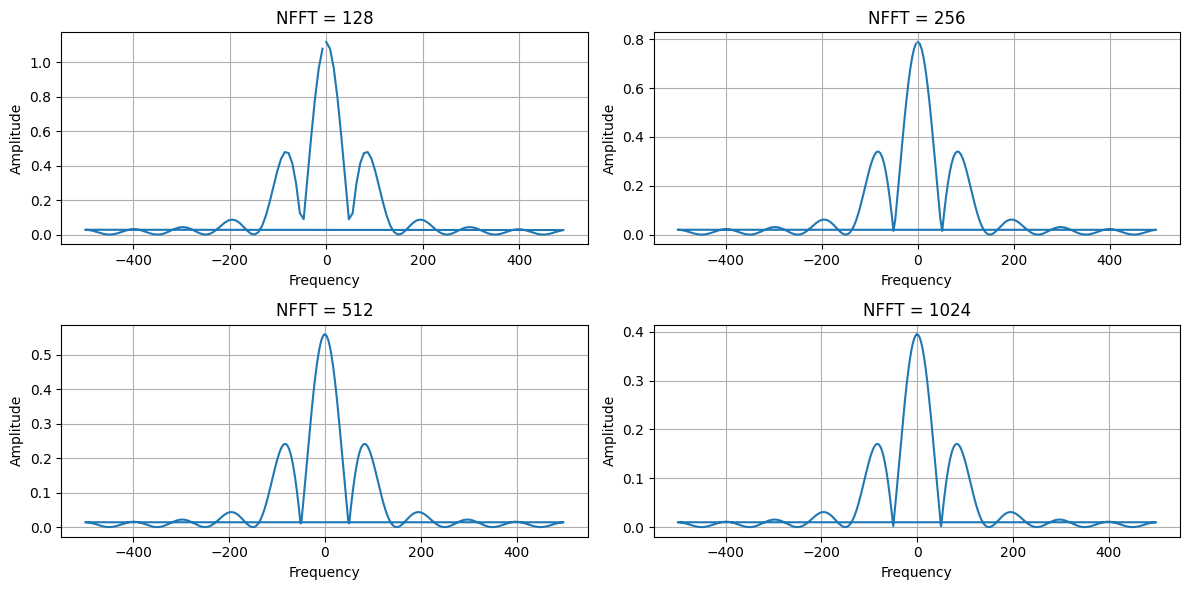

In [175]:
### 2. Calcule la matriz de transformación U y grafique la transformada de Fourier de la señal asignada para al menos 4 distintos valores de NFFT (grafique los resultados usando subplots). ¿Qué se puede concluir al respecto?

#Number of samples for the DFT
nfft = [2**n for n in range(7, 11, 1)]

#Convert the vector x to column vector
x_column = x[:, None]


#Calculate the DFT matrix
N = len(x) #Number of samples of the signal
U = [dftmatrix(N, n) for n in nfft]

#Calculate the DFT of the signal
X = [U[i].H * x_column[:] for i in range(len(nfft))]

#Frequency vector
f = [ np.hstack((np.arange(0, n//2), np.arange(-n//2, 0)))*f_sampling/n for n in nfft]


#Graph of the DFT
plt.figure(figsize=(12, 6))
for i in range(len(nfft)):
    plt.subplot(2, 2, i+1)
    plt.plot(f[i], np.abs(X[i]))
    plt.title('NFFT = %d' % nfft[i])
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()


Cada vez que se aumenta el número de muestras NFFT, se obtiene una mejor resolución en la frecuencia de la señal. Por lo tanto, se puede concluir que el número de muestras NFFT influye en la resolución de la frecuencia de la señal.

### 3. Use la siguiente instrucción para calcular la transformada inversa en cada uno de los casos del ítem anterior.
inversa=np.fft.ifft(signal) #signal: Frequency-domain signal

In [176]:
### 3. Use la siguiente instrucci´on para calcular la transformada inversa en cada uno de los casos del ´ıtem anterior. inversa=np.fft.ifft(signal) #signal: Frequency-domain signal

#Calculate the inverse DFT
inverse = [np.fft.ifft(X[i].T) for i in range(len(nfft))]
inverse_1 = [np.real(inverse[i].flatten()) for i in range(len(nfft))]
#Normalize the inverse signal
for i in range(len(nfft)):
    inverse_1[i] = inverse_1[i]/max(np.abs(inverse_1[i]))
    
#Calculate the time vector for the inverse signal
inverse_2 = [np.dot(Ui, Xi).real for Ui, Xi in zip(U, X)]

#Calculate the time vector for the inverse signal
t_inverse = np.arange(0, 1/f_signal, 1/f_sampling)


### 4. Grafique los resultados usando subplots y comparelos. ¿Puede observar alguna diferencia?, ¿a que se debe esto? Escriba sus conclusiones.

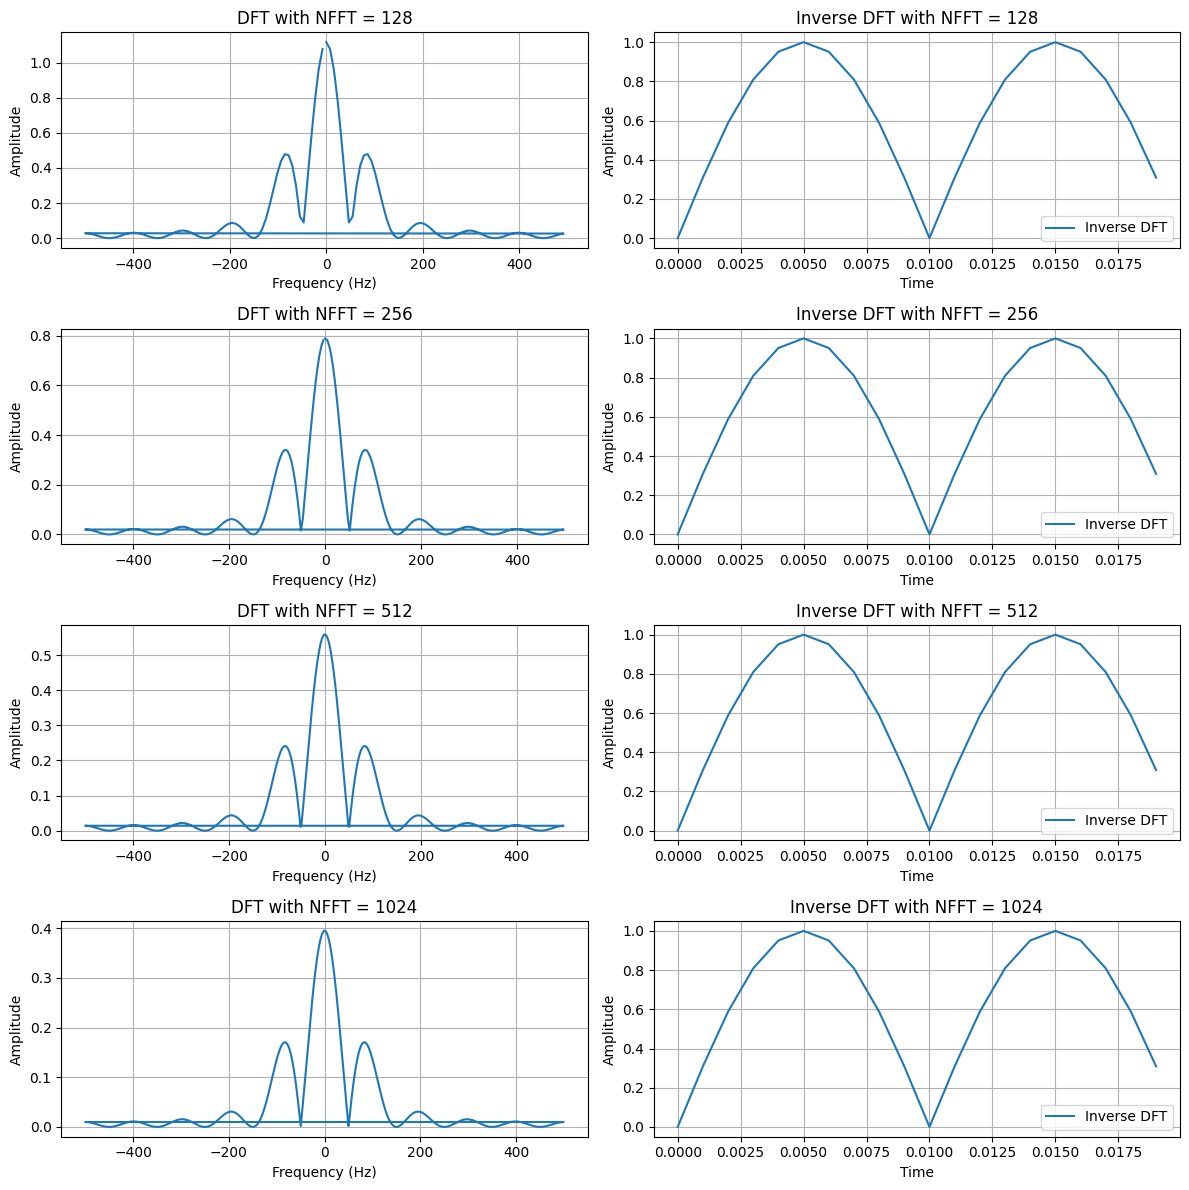

In [177]:
### 4. Grafique los resultados usando subplots y comparelos. ¿Puede observar alguna diferencia?, ¿a que se debe esto? Escriba sus conclusiones.

#Graph of the signal
plt.figure(figsize=(12, 12))



#Graph of the inverse signal
for i in range(len(nfft)):

    plt.subplot(len(nfft), 2, 2*i + 1)
    plt.plot(f[i], np.abs(X[i]))
    plt.title('DFT with NFFT = %d' % nfft[i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.subplot(len(nfft), 2, 2*i + 2)
    plt.plot(t,inverse_1[i][:len(t)], label='Inverse DFT')
    #plt.plot(t, x, label='Original signal', alpha=0.3, color='red')
    plt.title('Inverse DFT with NFFT = %d' % nfft[i])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
plt.tight_layout()
plt.show()


Por cada valor diferente de NFFT se observa que al grafica toda la señal de la inversa se rellenan despues de la cantidad de puntos original de la señal con ceros, esto debido a la resolución de la transformada que se eleige en cada caso. Ademas es necesario realizar una normalización. 

## Modulación PSK

### 1. Codifique los dos últimos dígitos de su cédula en binario (4 bits por dígito), y arme una trama de bits para ser transmitida.


In [167]:
### 1. Codifique los dos últimos dígitos de su cédula en binario (4 bits por dígito), y arme una trama de bits para ser transmitida.

#Number to be converted to binary of 4 bits
def num2bin(num):
    return format(num, '04b')

#Last two digits of the ID
ID = 50
ID_bin = ''.join([num2bin(int(d)) for d in str(ID)])

print('ID in binary:', ID_bin)

ID in binary: 01010000


### 2. Usando Eb =1, Tb =0.002, fc =1000 Hz, f s=7000 Hz genere las señales s0 y s1 para la transmisión de la trama de bits.

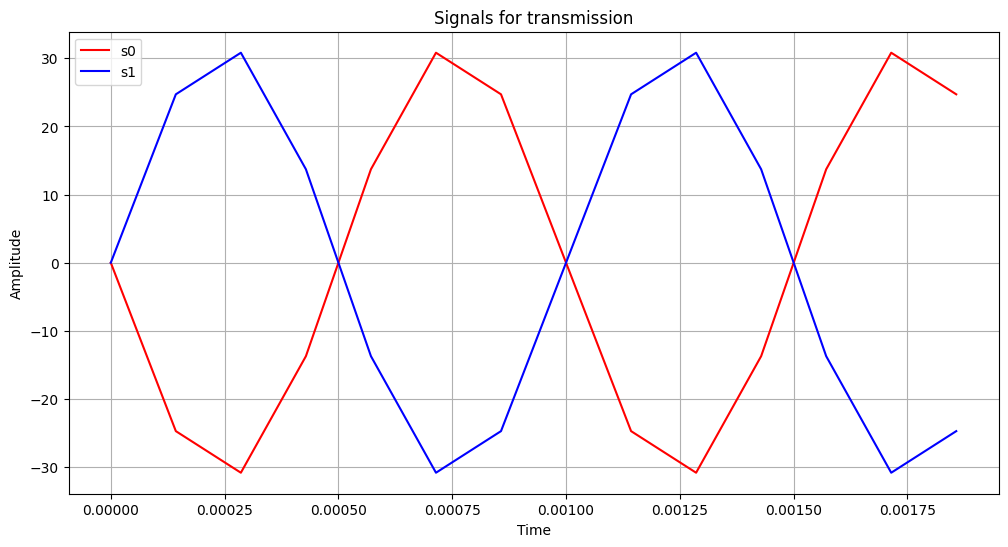

In [168]:
### 2. Usando Eb =1, Tb =0.002, fc =1000 Hz, f s=7000 Hz genere las señales s0 y s1 para la transmisión de la trama de bits.

#Constants for the signal
Eb = 1 #Energy per bit [J]
Tb = 0.002 #Bit period [s]
fc = 1000 #Carrier frequency [Hz]
fs = 7000 #Sampling frequency [Hz]

#Time vector for the signal
t = np.arange(0, Tb, 1/fs)

#Signal for 0
s0 = -np.sqrt(2*Eb/Tb) * np.sin(2*np.pi*fc*t)

#Signal for 1
s1 = np.sqrt(2*Eb/Tb) * np.sin(2*np.pi*fc*t)

#Graph of the signals
plt.figure(figsize=(12, 6))
plt.plot(t, s0, label='s0', color='red')
plt.plot(t, s1, label='s1', color='blue')
plt.title('Signals for transmission')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()


### 3. Calcule y grafique la FFT de amplitud y fase de las señales s0 y s1 (escoja una NFFT donde visualice correctamente la FFT). ¿Cuál es la diferencia entre ambas?.

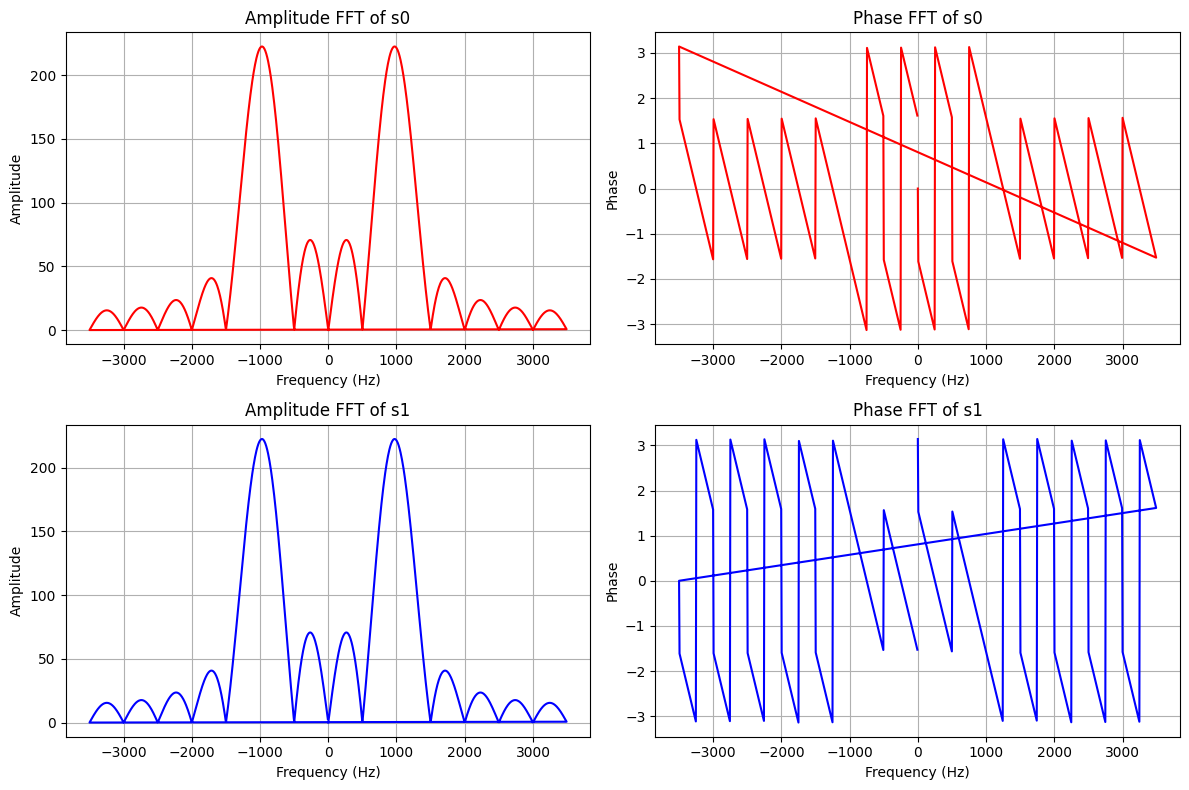

In [169]:
### 3. Calcule y grafique la FFT de amplitud y fase de las señales s0 y s1 (escoja una NFFT donde visualice correctamente la FFT). ¿Cuál es la diferencia entre ambas?.

#Number of samples for the DFT
nfft = 1024

#Calculate the DFT of the signals
S0 = np.fft.fft(s0, nfft)
S1 = np.fft.fft(s1, nfft)

#Frequency vector
f = np.fft.fftfreq(nfft, 1/fs)

#Graph of the DFT
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(f, np.abs(S0), color='red')
plt.title('Amplitude FFT of s0')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(f, np.angle(S0), color='red')
plt.title('Phase FFT of s0')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(f, np.abs(S1), color='blue')
plt.title('Amplitude FFT of s1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(f, np.angle(S1), color='blue')
plt.title('Phase FFT of s1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid()

plt.tight_layout()
plt.show()


En el espectrograma de de la señal no evidencia diferencia entre ambas señales, ya que ambas tienen la misma frecuencia y amplitud, por otro lado en la fase se evidencia que la señal s0 tiene una fase de 180 grados, mientras que la señal s1 tiene una fase de 0 grados.

Ante cualquier frecuencia el desfase entre s0 y s1 es de 180 grados, lo que indica que la señal s1 está adelantada en 180 grados con respecto a s0.

### 4. Concatene las señales s0 y s1 de acuerdo con la trama a enviar, por ejemplo: si la trama a enviar es ’0010’, la señal a enviar es [s0 , s0 , s1 , s0 ].

In [170]:
### 4. Concatene las señales s0 y s1 de acuerdo con la trama a enviar, por ejemplo: si la trama a enviar es ’0010’, la señal a enviar es [s0 , s0 , s1 , s0 ].

#Signal to be transmitted
signal = np.hstack([s0 if b == '0' else s1 for b in ID_bin])

#Time vector for the signal
t = np.arange(0, len(signal)/fs, 1/fs)


### 5. Grafique la señal obtenida en el tiempo. ¿Se puede distinguir cada uno de los bits?.

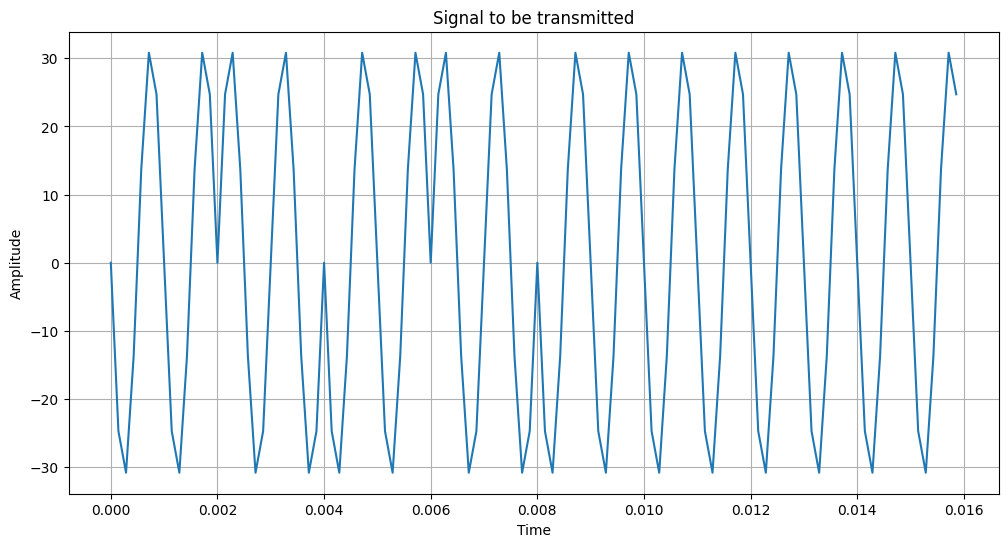

In [171]:
### 5. Grafique la señal obtenida en el tiempo. ¿Se puede distinguir cada uno de los bits?.

#Graph of the signal
plt.figure(figsize=(12, 6))
plt.plot(t, signal)
plt.title('Signal to be transmitted')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


Los cambios de cada bit se alcanzan a distinguir, esto se debe a que conocemos el tiempo de bit Tb, por lo que podemos visualizar cada uno de los bits en la señal.

### 6. Calcule y grafique la FFT de magnitud y fase de la señal concatenada. ¿Qué se puede apreciar?

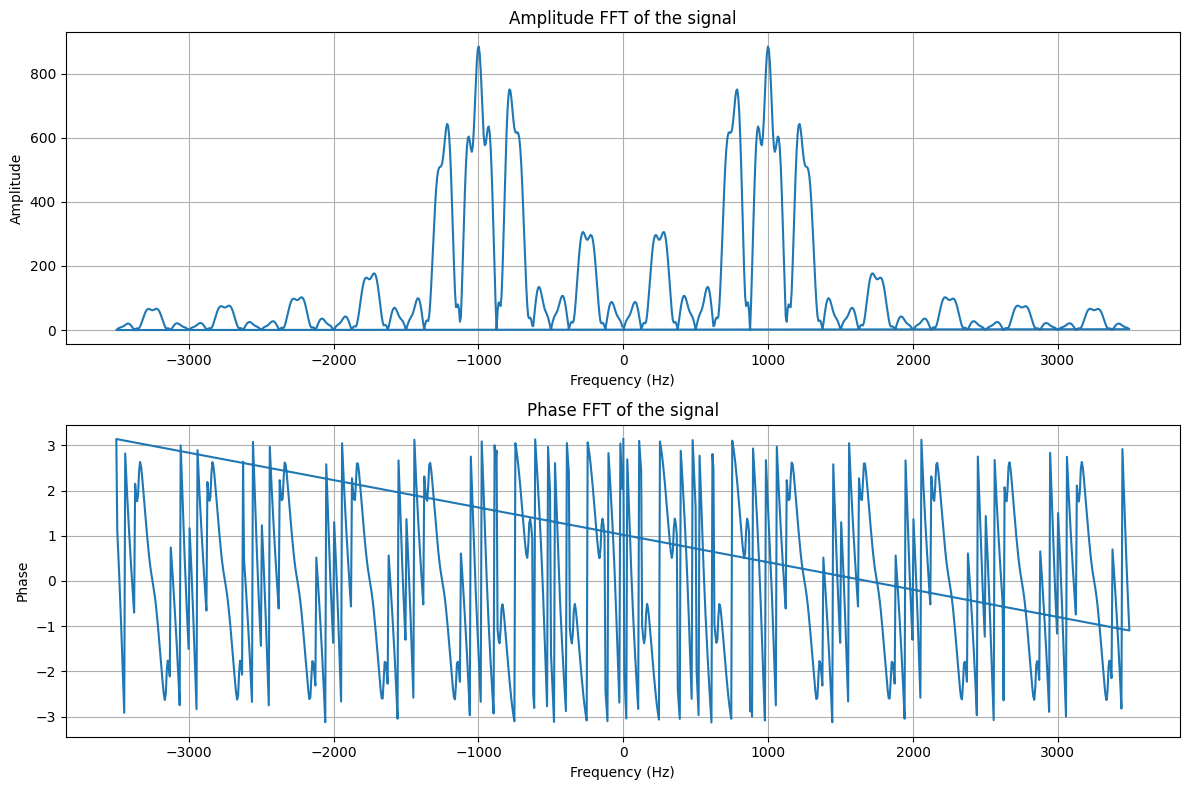

In [172]:
### 6. Calcule y grafique la FFT de magnitud y fase de la señal concatenada. ¿Qué se puede apreciar?

#Calculate the DFT of the signal
signal_fft = np.fft.fft(signal, nfft)

#Frequency vector
f = np.fft.fftfreq(nfft, 1/fs)

#Graph of the DFT
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(f, np.abs(signal_fft))
plt.title('Amplitude FFT of the signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(f, np.angle(signal_fft))
plt.title('Phase FFT of the signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid()

plt.tight_layout()
plt.show()


En el espectro de magnitud se puede apreciar la presencia de las dos frecuencias portadoras, mientras que en el espectro de fase se puede apreciar la presencia de dos fases distintas para cada una de las portadoras. Esto se debe a que la señal está compuesta por dos señales portadoras con distinta fase y amplitud. 

Al rededor de la frecuencia de la portadora se puede apreciar la presencia de los armónicos de la señal, lo cual es característico de una señal modulada en amplitud. DEbido a interfencia constructiva y destructiva, se puede apreciar la presencia de los armónicos de la señal en el espectro de magnitud.

## Conclusiones

### Transformada Rápida de Fourier (FFT)
La Transformada Rápida de Fourier (FFT) es una herramienta poderosa para analizar señales en el dominio de la frecuencia. Algunas conclusiones importantes sobre su uso son:

- **Resolución de Frecuencia**: La resolución de la frecuencia de la señal mejora al aumentar el número de puntos NFFT. Esto permite una representación más detallada de las componentes frecuenciales de la señal.
- **Potencia de 2**: Es recomendable que el número de puntos NFFT sea una potencia de 2. Esto se debe a que los algoritmos FFT están optimizados para tamaños de entrada que son potencias de 2, lo que resulta en una mayor eficiencia computacional.
- **Relleno con Ceros**: En la transformada inversa de Fourier, los últimos puntos de la señal se rellenan con ceros debido al valor de NFFT. Esto puede introducir artefactos en la señal reconstruida, especialmente si NFFT es significativamente mayor que el número de muestras originales de la señal.

### Modulación PSK
En la modulación por desplazamiento de fase (PSK), la información se transmite mediante cambios en la fase de la señal portadora. Algunas observaciones sobre su análisis en el dominio de la frecuencia son:

- **Espectro de Magnitud**: Espectralmente, las señales moduladas en PSK (s0 y s1) son idénticas en términos de magnitud. Esto se debe a que ambas señales tienen la misma frecuencia y amplitud.
- **Espectro de Fase**: La diferencia entre las señales s0 y s1 es evidente en el espectro de fase. La señal s0 tiene una fase de 180 grados, mientras que la señal s1 tiene una fase de 0 grados. Este desfase de 180 grados es la característica distintiva de la modulación PSK.
- **Interferencia Constructiva y Destructiva**: En el espectro de magnitud, se pueden apreciar los armónicos de la señal debido a la interferencia constructiva y destructiva, lo cual es característico de una señal modulada en amplitud.
